In [1]:
import pandas as pd 
import geopandas as gpd 
import movingpandas as mpd 
import shapely as shp 
import hvplot.pandas
import folium
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
from holoviews import opts

import warnings
warnings.filterwarnings('ignore')

plot_defaults = dict(linewidth=5, capstyle='round', figsize=(9,5))
opts.defaults(
    opts.Overlay(active_tools=['wheel_zoom'], 
                 frame_width=500, 
                 frame_height=400)
)

In [3]:
df = pd.read_csv('data/b2/combined.csv')
df

Id        Lat         Lon  Elev  \
0      Workout-2024-02-10-16-10-00  35.147632 -106.708359  1533   
1      Workout-2024-02-10-16-10-00  35.147632 -106.708359  1533   
2      Workout-2024-02-10-16-10-00  35.147543 -106.708335  1540   
3      Workout-2024-02-10-16-10-00  35.147474 -106.708251  1542   
4      Workout-2024-02-10-16-10-00  35.147430 -106.708152  1543   
...                            ...        ...         ...   ...   
39294  Workout-2024-01-18-19-34-44  35.147338 -106.707810  1541   
39295  Workout-2024-01-18-19-34-44  35.147420 -106.707879  1541   
39296  Workout-2024-01-18-19-34-44  35.147460 -106.707987  1541   
39297  Workout-2024-01-18-19-34-44  35.147449 -106.708035  1541   
39298  Workout-2024-01-18-19-34-44  35.147449 -106.708035  1560   

                           Time  Temp  Weather  
0      2024-02-10T16:10:00.846Z -4.69        4  
1      2024-02-10T16:10:01.509Z -4.69        4  
2      2024-02-10T16:10:32.313Z -4.69        4  
3      2024-02-10T16:10:40.308Z -4.69        4  
4      2024-02-10T16:10:47.329Z -4.69        4  
...                         ...   ...      ...  
39294  2024-01-18T21:05:32.804Z  5.91        1  
39295  2024-01-18T21:05:40.826Z  5.91        1  
39296  2024-01-18T21:05:47.817Z  5.91        1  
39297  2024-01-18T21:05:52.782Z  5.91        1  
39298  2024-01-18T21:05:53.091Z  5.91        1  

[39299 rows x 7 columns]

In [4]:
gdf = gpd.GeoDataFrame( 
    df, 
    geometry=gpd.points_from_xy(x=df.Lon, y=df.Lat)
).set_crs(4269)

In [5]:
idList = list(gdf.groupby(['Id']).nunique().reset_index().Id)

In [6]:
for i, track in enumerate(idList):
    gdf.loc[gdf.Id == track, 'trajectory_id'] = i

In [7]:
print(gdf[gdf.trajectory_id == 0].iloc[0], 
gdf[gdf.trajectory_id == 1].iloc[0], 
gdf[gdf.trajectory_id == 2].iloc[0])

Id                 Workout-2023-12-25-18-18-18
Lat                                  35.147413
Lon                                -106.708016
Elev                                      1536
Time                  2023-12-25T18:18:18.559Z
Temp                                     -2.57
Weather                                      0
geometry         POINT (-106.708016 35.147413)
trajectory_id                              0.0
Name: 2113, dtype: object Id                 Workout-2023-12-28-22-53-52
Lat                                  35.147511
Lon                                -106.708192
Elev                                      1530
Time                  2023-12-28T22:53:52.514Z
Temp                                      4.75
Weather                                      0
geometry         POINT (-106.708192 35.147511)
trajectory_id                              1.0
Name: 14757, dtype: object Id                 Workout-2023-12-30-20-25-09
Lat                                  35.147537
Lon    

In [8]:
traj_collection = mpd.TrajectoryCollection(gdf, 
                                          'trajectory_id', 
                                          t='Time', x='Lon', y='Lat')
print(traj_collection)

TrajectoryCollection with 53 trajectories


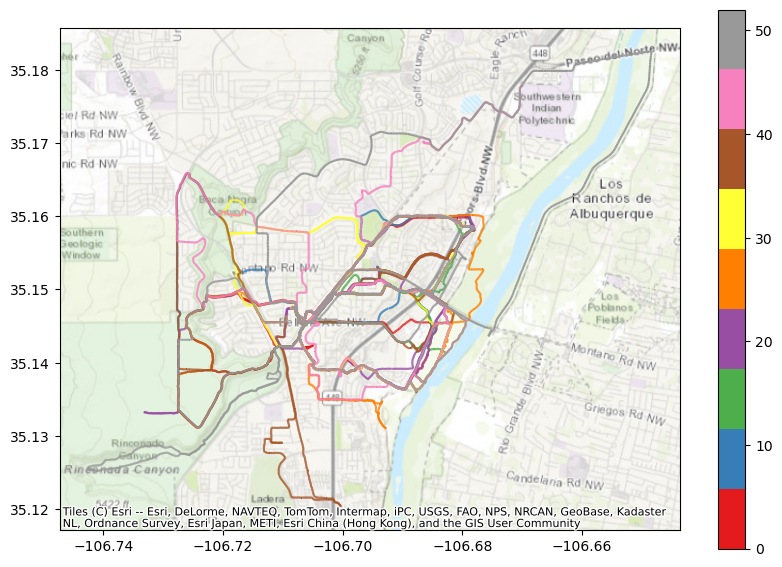

In [9]:
ax = traj_collection.plot(column='trajectory_id', legend=True, figsize=(10,7), cmap='Set1')
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.Esri.WorldTopoMap);

In [20]:
my_traj = traj_collection.trajectories[10]

In [21]:
print(my_traj)

Trajectory 10.0 (2024-01-15 20:17:53.340000 to 2024-01-15 22:12:09.570000) | Size: 972 | Length: 10358.6m
Bounds: (-106.727733, 35.131108, -106.70611, 35.165888)
LINESTRING (-106.708375 35.14754, -106.708375 35.14754, -106.708307 35.147462, -106.708188 35.147447


<Axes: >

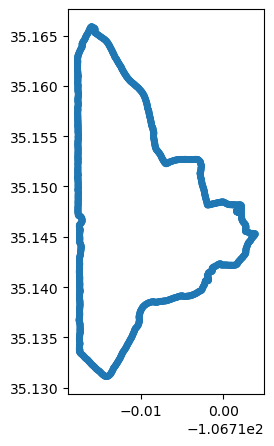

In [22]:
my_traj.plot(linewidth=5, capstyle='round', figsize=(9,5))

In [23]:
my_traj.hvplot(line_width=7.0, tiles='OSM')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (triangle_angle)

In [24]:
my_traj.explore(tiles='CartoDB positron', syle_kwds={'weight':4})

# Speed

In [38]:
df2 = pd.read_csv('data/b3/combined.csv')
df2

Id      Name        Lat        Lon  Elev  \
0     Workout-2024-09-11-17-43-42  New York  40.752025 -73.991157    91   
1     Workout-2024-09-11-17-43-42  New York  40.752025 -73.991157    91   
2     Workout-2024-09-11-17-43-42  New York  40.752071 -73.991271    78   
3     Workout-2024-09-11-17-43-42  New York  40.752118 -73.991378    63   
4     Workout-2024-09-11-17-43-42  New York  40.752164 -73.991489    43   
...                           ...       ...        ...        ...   ...   
1751  Workout-2024-09-07-21-20-23    Mahwah  41.024923 -74.167850    65   
1752  Workout-2024-09-07-21-20-23    Mahwah  41.024302 -74.167725    63   
1753  Workout-2024-09-07-21-20-23    Mahwah  41.023519 -74.167598    61   
1754  Workout-2024-09-07-21-20-23    Mahwah  41.022727 -74.167511    60   
1755  Workout-2024-09-07-21-20-23    Mahwah  41.022727 -74.167511    60   

                          Time   Temp  Weather  
0     2024-09-11T17:43:42.890Z  22.46        1  
1     2024-09-11T17:43:43.091Z  22.46        1  
2     2024-09-11T17:43:51.108Z  22.46        1  
3     2024-09-11T17:44:00.090Z  22.46        1  
4     2024-09-11T17:44:12.103Z  22.46        1  
...                        ...    ...      ...  
1751  2024-09-07T22:03:25.544Z  15.31        3  
1752  2024-09-07T22:03:29.531Z  15.31        3  
1753  2024-09-07T22:03:34.550Z  15.31        3  
1754  2024-09-07T22:03:39.552Z  15.31        3  
1755  2024-09-07T22:03:42.022Z  15.31        3  

[1756 rows x 8 columns]

In [39]:
gdf2 = gpd.GeoDataFrame( 
    df2, 
    geometry=gpd.points_from_xy(x=df.Lon, y=df.Lat)
).set_crs(4269)

In [40]:
idList2 = list(gdf2.groupby(['Id']).nunique().reset_index().Id)

In [41]:
for i, track in enumerate(idList2):
    gdf2.loc[gdf2.Id == track, 'trajectory_id'] = i

In [42]:
traj_collection2 = mpd.TrajectoryCollection(gdf2, 
                                          'trajectory_id', 
                                          t='Time', x='Lon', y='Lat')
print(traj_collection2)

TrajectoryCollection with 3 trajectories


In [45]:
traj_collection2.trajectories[2].df

Id      Name        Lat  \
Time                                                                        
2024-09-11 17:43:42.890  Workout-2024-09-11-17-43-42  New York  40.752025   
2024-09-11 17:43:43.091  Workout-2024-09-11-17-43-42  New York  40.752025   
2024-09-11 17:43:51.108  Workout-2024-09-11-17-43-42  New York  40.752071   
2024-09-11 17:44:00.090  Workout-2024-09-11-17-43-42  New York  40.752118   
2024-09-11 17:44:12.103  Workout-2024-09-11-17-43-42  New York  40.752164   
...                                              ...       ...        ...   
2024-09-11 20:34:03.089  Workout-2024-09-11-17-43-42  New York  40.727142   
2024-09-11 20:34:12.103  Workout-2024-09-11-17-43-42  New York  40.727053   
2024-09-11 20:34:19.174  Workout-2024-09-11-17-43-42  New York  40.726973   
2024-09-11 20:34:32.102  Workout-2024-09-11-17-43-42  New York  40.726903   
2024-09-11 20:49:09.775  Workout-2024-09-11-17-43-42  New York  40.726903   

                               Lon  Elev   Temp  Weather  \
Time                                                       
2024-09-11 17:43:42.890 -73.991157    91  22.46        1   
2024-09-11 17:43:43.091 -73.991157    91  22.46        1   
2024-09-11 17:43:51.108 -73.991271    78  22.46        1   
2024-09-11 17:44:00.090 -73.991378    63  22.46        1   
2024-09-11 17:44:12.103 -73.991489    43  22.46        1   
...                            ...   ...    ...      ...   
2024-09-11 20:34:03.089 -73.988772     0  22.46        1   
2024-09-11 20:34:12.103 -73.988839     0  22.46        1   
2024-09-11 20:34:19.174 -73.988897     0  22.46        1   
2024-09-11 20:34:32.102 -73.988940     0  22.46        1   
2024-09-11 20:49:09.775 -73.988940     0  22.46        1   

                                           geometry  trajectory_id  
Time                                                                
2024-09-11 17:43:42.890  POINT (-73.99116 40.75202)            2.0  
2024-09-11 17:43:43.091  POINT (-73.99116 40.75202)            2.0  
2024-09-11 17:43:51.108  POINT (-73.99127 40.75207)            2.0  
2024-09-11 17:44:00.090  POINT (-73.99138 40.75212)            2.0  
2024-09-11 17:44:12.103  POINT (-73.99149 40.75216)            2.0  
...                                             ...            ...  
2024-09-11 20:34:03.089  POINT (-73.98877 40.72714)            2.0  
2024-09-11 20:34:12.103  POINT (-73.98884 40.72705)            2.0  
2024-09-11 20:34:19.174   POINT (-73.9889 40.72697)            2.0  
2024-09-11 20:34:32.102   POINT (-73.98894 40.7269)            2.0  
2024-09-11 20:49:09.775   POINT (-73.98894 40.7269)            2.0  

[981 rows x 9 columns]

In [46]:
my_traj2 = traj_collection2.trajectories[2]

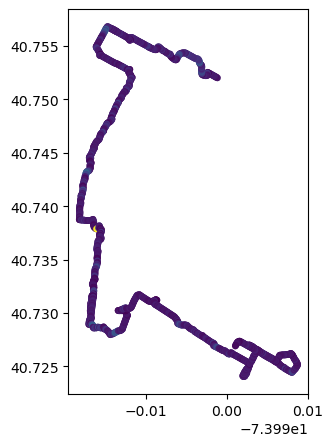

In [47]:
my_traj2.plot(
    column='speed', linewidth=5, capstyle='round', figsize=(9,5)
);

In [48]:
my_traj2.hvplot(
    c='speed', 
    clim=(0,10), 
    line_width=7.0, 
    tiles='CartoLight', 
    cmap='Viridis', 
    colorbar=True
)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]   (speed)
   .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)

In [22]:
gdf = read_file('../data/demodata_geolife.gpkg')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5908 entries, 0 to 5907
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             5908 non-null   int64   
 1   sequence       5908 non-null   int64   
 2   trajectory_id  5908 non-null   int64   
 3   tracker        5908 non-null   int32   
 4   t              5908 non-null   object  
 5   geometry       5908 non-null   geometry
dtypes: geometry(1), int32(1), int64(3), object(1)
memory usage: 254.0+ KB


In [23]:
tc2 = mpd.TrajectoryCollection(gdf, 'trajectory_id', t='t')

In [24]:
my_traj2 = tc2.trajectories[1]
my_traj2.df

id  sequence  ...  tracker                    geometry
t                                    ...                                     
2009-06-29 07:02:25  1556      1090  ...        0  POINT (116.59096 40.07196)
2009-06-29 07:02:30  1557      1091  ...        0   POINT (116.5909 40.07201)
2009-06-29 07:02:35  1558      1092  ...        0  POINT (116.59088 40.07203)
2009-06-29 07:02:40  1559      1093  ...        0    POINT (116.59092 40.072)
2009-06-29 07:02:45  1560      1094  ...        0  POINT (116.59096 40.07198)
...                   ...       ...  ...      ...                         ...
2009-06-29 11:09:47  2448      1982  ...        0  POINT (116.32349 40.00037)
2009-06-29 11:09:57  2449      1983  ...        0  POINT (116.32513 40.00057)
2009-06-29 11:10:02  2450      1984  ...        0  POINT (116.32688 40.00087)
2009-06-29 11:10:07  2451      1985  ...        0  POINT (116.32722 40.00101)
2009-06-29 11:13:12  2452      1986  ...        0  POINT (116.32746 40.00052)

[897 rows x 5 columns]

In [26]:
my_traj2.hvplot(
    c="speed",
    clim=(0, 20),
    line_width=7.0,
    tiles="CartoLight",
    cmap="Viridis",
    colorbar=True,
)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]   (speed)
   .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)

# Mover's position

## Point

In [33]:
t = datetime(2024, 9, 5, 16, 0, 1)
print(f'''
    Nearest:      {my_traj.get_position_at(t, method='nearest')}
    Interpolated: {my_traj.get_position_at(t, method='interpolated')}
    Previous row: {my_traj.get_position_at(t, method='ffill')}
    Next row:     {my_traj.get_position_at(t, method='bfill')}
''')


    Nearest:      POINT (-74.043698 41.046358)
    Interpolated: POINT (-74.04373608453506 41.04636481186806)
    Previous row: POINT (-74.043821 41.04638)
    Next row:     POINT (-74.043698 41.046358)



<Axes: >

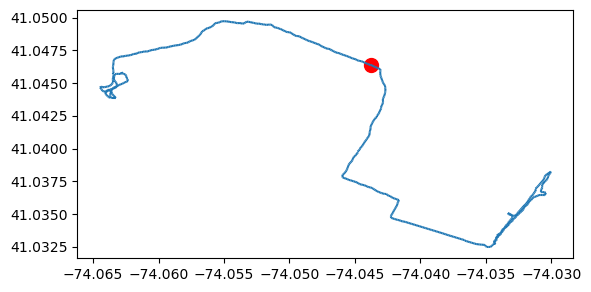

In [34]:
point = my_traj.get_position_at(t, method='interpolated')
ax = my_traj.plot() 
gpd.GeoSeries(point).plot(ax=ax, color='red', markersize=100)

## Segment

In [35]:
t2 = datetime(2024, 9, 5, 16, 15, 0)

In [36]:
segment = my_traj.get_segment_between(t, t2)
print(segment)

Trajectory 1_2024-09-05 16:00:01 (2024-09-05 16:00:02.868000 to 2024-09-05 16:14:57.877000) | Size: 132 | Length: 1412.2m
Bounds: (-74.045967, 41.036364, -74.0423, 41.046358)
LINESTRING (-74.043698 41.046358, -74.043602 41.046302, -74.0435 41.046249, -74.043399 41.046198, -7


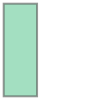

In [54]:
xmin, xmax, ymin, ymax = -74.0459, -74.0423, 41.036364, 41.046358
polygon = Polygon(
    [(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin), (xmin, ymin)]
)
polygon

In [55]:
intersections = my_traj.clip(polygon) 
intersections

TrajectoryCollection with 2 trajectories

<Axes: >

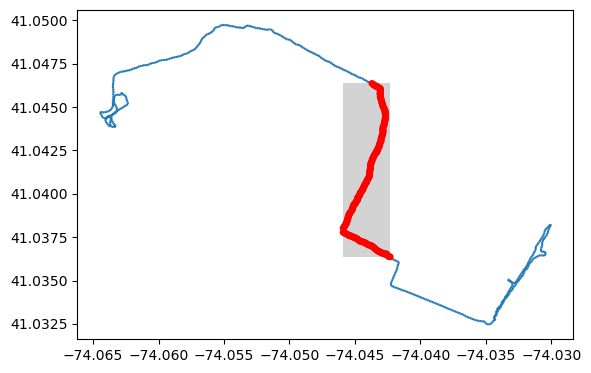

In [57]:
ax = my_traj.plot()
gpd.GeoSeries(polygon).plot(ax=ax, color='lightgrey')
intersections.plot(ax=ax, color='r', linewidth=5, capstyle='round')

# Stop Detection

In [61]:
my_traj3 = tc2.trajectories[0]
my_traj3

Trajectory 1 (2008-12-11 04:42:14 to 2008-12-11 05:15:46) | Size: 466 | Length: 6207.0m
Bounds: (116.385602, 39.862378, 116.393553, 39.898723)
LINESTRING (116.391305 39.898573, 116.391317 39.898617, 116.390928 39.898613, 116.390833 39.898635, 

In [62]:
my_traj3_plot = my_traj3.hvplot(
    title='Trajectory {}'.format(my_traj3.id),
    line_width = 7.0, 
    tiles='CartoLight', 
    color='slategrey'
)
my_traj3_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (triangle_angle)

In [66]:
detector = mpd.TrajectoryStopDetector(my_traj3)

## Stop duration

In [67]:
%%time 
stop_time_ranges = detector.get_stop_time_ranges(
    min_duration=timedelta(seconds=60), 
    max_diameter=100
)

CPU times: user 75.3 ms, sys: 1.1 ms, total: 76.4 ms
Wall time: 77 ms


In [68]:
for x in stop_time_ranges: print(x)

Traj 1: 2008-12-11 04:42:14 - 2008-12-11 04:43:32 (duration: 0 days 00:01:18)
Traj 1: 2008-12-11 04:43:52 - 2008-12-11 04:47:40 (duration: 0 days 00:03:48)
Traj 1: 2008-12-11 04:50:06 - 2008-12-11 04:51:23 (duration: 0 days 00:01:17)
Traj 1: 2008-12-11 04:54:50 - 2008-12-11 04:55:55 (duration: 0 days 00:01:05)
Traj 1: 2008-12-11 05:02:03 - 2008-12-11 05:06:34 (duration: 0 days 00:04:31)
Traj 1: 2008-12-11 05:07:19 - 2008-12-11 05:08:31 (duration: 0 days 00:01:12)
Traj 1: 2008-12-11 05:11:17 - 2008-12-11 05:13:38 (duration: 0 days 00:02:21)
Traj 1: 2008-12-11 05:13:51 - 2008-12-11 05:15:46 (duration: 0 days 00:01:55)


## Stop points

In [69]:
stop_points = detector.get_stop_points(
    min_duration=timedelta(seconds=60), max_diameter=100
)
stop_points

geometry  ... duration_s
stop_id                                            ...           
1_2008-12-11 04:42:14  POINT (116.39112 39.89862)  ...       78.0
1_2008-12-11 04:43:52   POINT (116.3907 39.89838)  ...      228.0
1_2008-12-11 04:50:06  POINT (116.38932 39.88923)  ...       77.0
1_2008-12-11 04:54:50  POINT (116.39232 39.87849)  ...       65.0
1_2008-12-11 05:02:03  POINT (116.39293 39.86384)  ...      271.0
1_2008-12-11 05:07:19  POINT (116.39024 39.86383)  ...       72.0
1_2008-12-11 05:11:17  POINT (116.38596 39.86519)  ...      141.0
1_2008-12-11 05:13:51  POINT (116.38603 39.86538)  ...      115.0

[8 rows x 5 columns]

In [70]:
stop_point_plot = my_traj3_plot * stop_points.hvplot(
    geo=True, size='duration_s', color='deeppink'
)
stop_point_plot

:Overlay
   .WMTS.I    :WMTS   [Longitude,Latitude]
   .Path.I    :Path   [Longitude,Latitude]
   .Points.I  :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.II :Points   [Longitude,Latitude]   (duration_s)

In [72]:
stop_points_gdf = gpd.GeoDataFrame(stop_points, geometry="geometry", 
                                  crs="EPSG:4326")

In [74]:
m = my_traj3.explore(
    color='blue', 
    style_kwds=dict(weight=4),
    name='Trajectory'
)

In [75]:
stop_points_gdf.explore(
    m=m, 
    color='red', 
    style_kwds={
        "style_function": lambda x: dict(radius=x['properties']['duration_s']/10)
    }, 
    name='Stop points'
)

folium.TileLayer("OpenStreetMap").add_to(m)
folium.LayerControl().add_to(m)

m

## Stop Segments

In [76]:
stop_segments = detector.get_stop_segments(
    min_duration=timedelta(seconds=60), max_diameter=100
)

In [77]:
stop_segments_plot = stop_point_plot * stop_segments.hvplot(
    line_width=7.0, tiles=None, color='orange'
)
stop_segments_plot

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .Path.I      :Path   [Longitude,Latitude]
   .Points.I    :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.II   :Points   [Longitude,Latitude]   (duration_s)
   .Path.II     :Path   [Longitude,Latitude]
   .Path.III    :Path   [Longitude,Latitude]
   .Path.IV     :Path   [Longitude,Latitude]
   .Path.V      :Path   [Longitude,Latitude]
   .Path.VI     :Path   [Longitude,Latitude]
   .Path.VII    :Path   [Longitude,Latitude]
   .Path.VIII   :Path   [Longitude,Latitude]
   .Path.IX     :Path   [Longitude,Latitude]
   .Points.III  :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.IV   :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.V    :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.VI   :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.VII  :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.VIII :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.IX   :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.X    :Points   [Longitude,Latitude]   (triangle_angle)

In [78]:
m = my_traj3.explore(
    color='blue', 
    tooltip='trajectory_id', 
    popup=True, 
    style_kwds=dict(weight=4), 
    names='Trajectory'
)
stop_segments.explore(
    m=m, 
    color='orange', 
    tooltip='trajectory_id',
    popup=True, 
    style_kwds=dict(weight=4), 
    name='Stop Segments'
)
stop_points_gdf.explore(
    m=m, 
    color='red',
    tooltip='stop_id', 
    popup=True, 
    marker_kwds=dict(radius=3), 
    name='Stop points'
)
folium.TileLayer('CartoDB positron').add_to(m)
folium.LayerControl().add_to(m)

m

## Split at stops

In [79]:
split = mpd.StopSplitter(my_traj3).split(
    min_duration=timedelta(seconds=60), max_diameter=100
)
split

TrajectoryCollection with 7 trajectories

In [80]:
split.to_traj_gdf()

trajectory_id             start_t  ...       length   direction
0  1_2008-12-11 04:43:32 2008-12-11 04:43:32  ...   264.335588  192.205758
1  1_2008-12-11 04:47:40 2008-12-11 04:47:40  ...  1070.704027  185.938120
2  1_2008-12-11 04:51:23 2008-12-11 04:51:23  ...  1378.618493  169.324962
3  1_2008-12-11 04:55:55 2008-12-11 04:55:55  ...  1909.066931  176.111541
4  1_2008-12-11 05:06:34 2008-12-11 05:06:34  ...   145.517971  262.952795
5  1_2008-12-11 05:08:31 2008-12-11 05:08:31  ...   439.686682  300.319621
6  1_2008-12-11 05:13:38 2008-12-11 05:13:38  ...    16.921893  349.846256

[7 rows x 6 columns]

In [81]:
split.explore(
    column="trajectory_id", tiles="CartoDB dark_matter", style_kwds={"weight": 4}
)

In [83]:
stop_segments_plot + split.hvplot(
    title="Trajectory {} split at stops".format(my_traj.id),
    line_width=7.0,
    tiles="CartoLight",
)

:Layout
   .Overlay.I  :Overlay
      .WMTS.I      :WMTS   [Longitude,Latitude]
      .Path.I      :Path   [Longitude,Latitude]
      .Points.I    :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.II   :Points   [Longitude,Latitude]   (duration_s)
      .Path.II     :Path   [Longitude,Latitude]
      .Path.III    :Path   [Longitude,Latitude]
      .Path.IV     :Path   [Longitude,Latitude]
      .Path.V      :Path   [Longitude,Latitude]
      .Path.VI     :Path   [Longitude,Latitude]
      .Path.VII    :Path   [Longitude,Latitude]
      .Path.VIII   :Path   [Longitude,Latitude]
      .Path.IX     :Path   [Longitude,Latitude]
      .Points.III  :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.IV   :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.V    :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.VI   :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.VII  :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.VIII :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.IX   :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.X    :Points   [Longitude,Latitude]   (triangle_angle)
   .Overlay.II :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .Path.I     :Path   [Longitude,Latitude]
      .Path.II    :Path   [Longitude,Latitude]
      .Path.III   :Path   [Longitude,Latitude]
      .Path.IV    :Path   [Longitude,Latitude]
      .Path.V     :Path   [Longitude,Latitude]
      .Path.VI    :Path   [Longitude,Latitude]
      .Path.VII   :Path   [Longitude,Latitude]
      .Points.I   :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.II  :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.III :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.IV  :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.V   :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.VI  :Points   [Longitude,Latitude]   (triangle_angle)
      .Points.VII :Points   [Longitude,Latitude]   (triangle_angle)

## Stop detection for collections

In [84]:
detector = mpd.TrajectoryStopDetector(tc2)
stop_points = detector.get_stop_points(
    min_duration=timedelta(seconds=120), max_diameter=100
)
len(stop_points)

31

<Axes: >

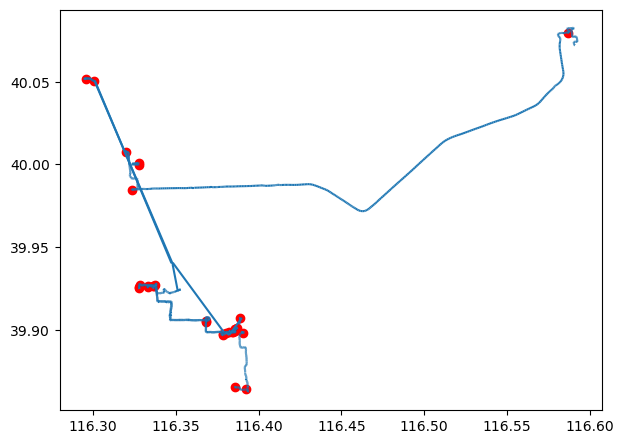

In [85]:
ax = tc2.plot(figsize=(7,7))
stop_points.plot(ax=ax, color='r')

In [86]:
m = tc2.explore(
    column="trajectory_id",
    tooltip="trajectory_id",
    popup=True,
    style_kwds={"weight": 4},
    name="Trajectories",
)

stop_points.explore(
    m=m,
    color="red",
    tooltip="stop_id",
    popup=True,
    marker_kwds={"radius": 5},
    name="Stop points",
)

folium.TileLayer("CartoDB positron").add_to(m)
folium.LayerControl().add_to(m)

m